In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib inline

import sys
sys.executable

'c:\\Data\\Projects\\phd\\cdl\\env\\Scripts\\python.exe'

In [2]:
from dinos.environments.playground import PlaygroundEnvironment
import dinos.environments.playground.scenes as playgroundScenes
# env = PlaygroundEnvironment(playgroundScenes.RoomWithWallsScene)
env = PlaygroundEnvironment(playgroundScenes.CylinderWallsScene)

from cdl.agents.learners.curiosity.saggriac import SAGGLearner
learner = SAGGLearner(env.world.findHost())
learner.adaptiveModels = False
# list(learner.trainStrategies)[0].exploreNonPrimitive = False

from dinos.core import display, logger, MoveConfig
import numpy as np

Loading chipmunk for Windows (64bit) [c:\Data\Projects\phd\cdl\env\lib\site-packages\pymunk\chipmunk.dll]
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


2021-10-22 13:42:53 RedSky exlogger:c[16640] INFO [modular] Module 'PlaygroundEnvironment' has been started
2021-10-22 13:42:54 RedSky exlogger:c[16640] INFO [modular] Module 'ModelDataset' has been started
2021-10-22 13:42:54 RedSky exlogger:c[16640] INFO [modular] Module 'ModelDataset' has been started
2021-10-22 13:42:54 RedSky exlogger:c[16640] INFO [modular] Module 'Agent' has been started
2021-10-22 13:42:54 RedSky exlogger:c[16640] INFO [modular] Module 'Performer' has been started
2021-10-22 13:42:54 RedSky exlogger:c[16640] INFO [modular] Module 'planner' has been started
2021-10-22 13:42:54 RedSky exlogger:c[16640] INFO [modular] Module 'ModelDataset' has been attached to 'Agent'
2021-10-22 13:42:54 RedSky exlogger:c[16640] INFO [modular] Module 'InterestModelManager' has been started
2021-10-22 13:42:54 RedSky exlogger:c[16640] INFO [modular] Module 'Strategy autonomousStrategy' has been started
2021-10-22 13:42:54 RedSky exlogger:c[16640] INFO [modular] Module 'Strategy aut

In [3]:
from cdl.agents.tools.models.interest_model import InterestModel
mMove = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'), learner.propertySpace('Agent.lidar'))
mRelativeObject = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mObject = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mButton = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Button1.pressed'), learner.propertySpace('#Cylinder1.position'))

# mObject.limitMoves = 0.3

# mrp = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mrp = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mo = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'), register=False)
# mo2 = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder2.position'), learner.propertySpace('#Cylinder2.positionToAgent'), register=False)

# learner.mods = learner.mods[:1]

2021-10-22 13:42:54 RedSky exlogger:c[16640] INFO [model] New model added: ModelInterestModel(@☰#8↝🕹'#Agent.move'↕2 | @☰#11↝👁'#Agent.lidar':PRE↕8 => @☰#9↝👁'#Agent.position'↕2)
2021-10-22 13:42:54 RedSky exlogger:c[16640] INFO [model] New model added: ModelInterestModel(@☰#9↝👁'#Agent.position'↕2 | @☰#15↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#14↝👁'#Cylinder1.positionToAgent'↕2)


In [4]:
# env.displayGui(True)
# env.image()

Material Base c(1 1 1 1) e(0 0 0 0) r0.5 m0.134752 l0 t0
Material Lidar c(1 1 1 1) e(0 0 0 0) r0.5 m0 l0 t0
Material Wheel c(0.025394 0.025394 0.025394 1) e(0 0 0 0) r0.5 m0 l0 t0

LPoint2f(50, 50) LPoint2f(550, 50)
LPoint2f(550, 48) LPoint2f(550, 503)
LPoint2f(550, 500) LPoint2f(50, 500)
LPoint2f(50, 503) LPoint2f(50, 48)
LPoint2f(260, 200) LPoint2f(260, 400)


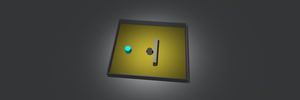

In [5]:
env.engine.graphicalEngines[1].image()

In [14]:
from panda3d.core import GeomVertexReader

def processVertexData(vdata):
    vertex = GeomVertexReader(vdata, 'vertex')
    normal = GeomVertexReader(vdata, 'normal')
    color = GeomVertexReader(vdata, 'color')
    # texcoord = GeomVertexReader(vdata, 'texcoord')
    while not vertex.isAtEnd():
        v = vertex.getData3()
        n = normal.getData3()
        # c = color.getData4()
        # t = texcoord.getData2()
        print("v = %s, n= %s" % (repr(v), repr(n)))  # , , repr(c)repr(t))), c = %s, t = %s

def processPrimitive(prim, vdata):
    vertex = GeomVertexReader(vdata, 'vertex')

    prim = prim.decompose()

    for p in range(prim.getNumPrimitives()):
        s = prim.getPrimitiveStart(p)
        e = prim.getPrimitiveEnd(p)
        for i in range(s, e):
            vi = prim.getVertex(i)
            vertex.setRow(vi)
            v = vertex.getData3()
            print("prim %s has vertex %s: %s" % (p, vi, repr(v)))

def processGeom(geom):
    vdata = geom.getVertexData()
    # print(vdata)
    processVertexData(vdata)
    for i in range(geom.getNumPrimitives()):
        prim = geom.getPrimitive(i)
        # print(prim)
        processPrimitive(prim, vdata)

def processGeomNode(geomNode):
    for i in range(geomNode.getNumGeoms()):
        geom = geomNode.getGeom(i)
        state = geomNode.getGeomState(i)
        # print(geom)
        # print(state)
        processGeom(geom)


In [15]:
agent = env.world.findHost()

geomNodeCollection = agent.robotModel.findAllMatches('**/+GeomNode')
for nodePath in geomNodeCollection:
    geomNode = nodePath.node()
    processGeomNode(geomNode)


AssertionError: has_column() at line 402 of c:\buildslave\sdk-windows-amd64\build\built1.10\include\geomVertexReader.I

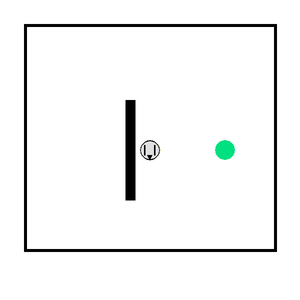

In [4]:
env.image()

In [32]:
learner.train(1)

In [7]:
[e[2] for e in learner.interestModel.errors if e[2].value[0] < -0.9]

[Action[#5↝🕹'#Agent.move'↕2 @☰±-1.000,  0.292],
 Action[#5↝🕹'#Agent.move'↕2 @☰±-0.981,  0.165],
 Action[#5↝🕹'#Agent.move'↕2 @☰±-0.970,  0.227]]

In [14]:
learner.propertySpace('Agent.move').getData(121)

array([-1.        , -0.47188923])

In [17]:
from dino.data.space import SpaceKind
learner.propertySpace('Agent.position', kind=SpaceKind.PRE).getData(121)

array([320.41330416, 397.30842515])

No handles with labels found to put in legend.


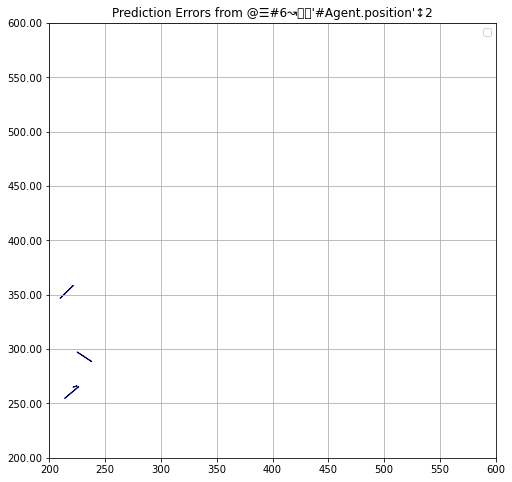

In [12]:
display(learner.interestModel.visualizeErrors(mMove.outcomeSpace))

No handles with labels found to put in legend.


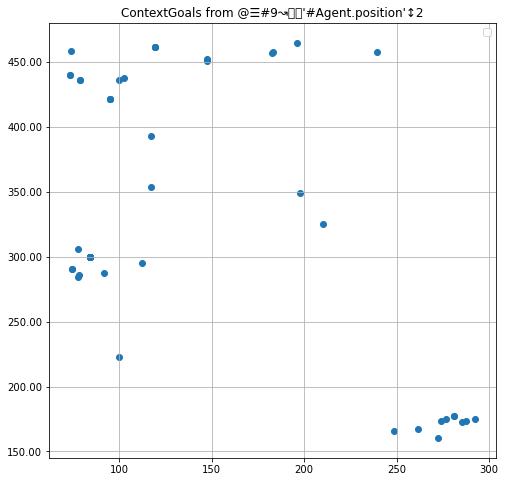

In [13]:
display(learner.analyse.visualizeContextGoals())

In [6]:
# display(learner.analyse.visualizeGoalErrors())

In [6]:
# learner.configHistory

In [5]:
for _ in range(5):
    learner.train(100)
    env.evaluate()

c:\Data\Projects\phd\cdl\env\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Data\Projects\phd\cdl\env\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
2021-10-08 14:45:03 RedSky exlogger:c[8936] INFO 10...
2021-10-08 14:45:04 RedSky exlogger:c[8936] INFO [interest] Creating interestMap for model ModelInterestModel(@☰#8↝🕹'#Agent.move'↕2 | @☰#11↝👁'#Agent.lidar':PRE↕8 => @☰#9↝👁'#Agent.position'↕2), strategy Strategy autonomousStrategy
2021-10-08 14:45:04 RedSky exlogger:c[8936] INFO [interest] Creating interestMap for model ModelInterestModel(@☰#9↝👁'#Agent.position'↕2 | @☰#15↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#14↝👁'#Cylinder1.positionToAgent'↕2), strategy Strategy autonomousStrategy
2021-10-08 14:45:04 RedSky exlogger:c[8936] INFO 20...
2021-10-08 14:45:05 RedSky exlogger:c[8936] INFO 30...
2021-10-08 14:45:06 RedSky exlogger:c[8936] INFO 40.

KeyboardInterrupt: 

In [52]:
env.world.child('Agent').body.position = [350,  350]
# env.world.child('#Cylinder1').body.position = [150,  350]

# with logger().debugging2('plan'):
learner.reach(learner.propertySpace('Agent.position').point([150,  350]).setRelative(False))


2021-10-04 11:50:29 RedSky exlogger:c[13600] INFO 760...
2021-10-04 11:50:29 RedSky exlogger:c[13600] INFO [interest] HEYP 0.0124 for action Action[#5↝🕹'#Agent.move'↕2 @☰±-0.628,  0.813] predictedOutcome Data[#6↝👁'#Agent.position'↕2 @☰±-16.668,  20.927] =? Observation[#6↝👁'#Agent.position'↕2 @☰-16.440,  21.261] model ModelInterestModel(@☰#5↝🕹'#Agent.move'↕2 | @☰#8↝👁'#Agent.lidar':PRE↕8 => @☰#6↝👁'#Agent.position'↕2)


In [10]:
env.world.child('Agent').body.position = [350,  150]
env.world.child('#Cylinder1').body.position = [150,  150]
env.image();

# with logger().debugging2('plan'):
learner.reach(learner.propertySpace('#Cylinder1.positionToAgent').point([0,  -100]).setRelative(False))

2021-10-04 13:37:22 RedSky exlogger:c[11428] INFO [interest] HEYP 0.1232 for action Action[#8↝🕹'#Agent.move'↕2 @☰±-0.657,  0.873] predictedOutcome Data[#9↝👁'#Agent.position'↕2 @☰±-17.156,  22.796] =? Observation[#9↝👁'#Agent.position'↕2 @☰-14.734,  19.845] model ModelInterestModel(@☰#8↝🕹'#Agent.move'↕2 | @☰#11↝👁'#Agent.lidar':PRE↕8 => @☰#9↝👁'#Agent.position'↕2)
2021-10-04 13:37:22 RedSky exlogger:c[11428] INFO [performer] Iter (d1) 0: prediction is Data[#9↝👁'#Agent.position'↕2 @☰±-16.383,  21.864] ?= planned Data[#9↝👁'#Agent.position'↕2 @☰±-17.156,  22.796] ?= got Observation[#0→👁'#Agent.position'↕2 @-14.734,  19.845]
2021-10-04 13:37:22 RedSky exlogger:c[11428] INFO [performer] Iter (d1) 0: max derive exceeded (3.7407 > 1.4735) trying to reach Data[#9↝👁'#Agent.position'↕2 @☰±-17.156,  22.796] by doing Action[#8↝🕹'#Agent.move'↕2 @☰±-0.657,  0.873] to get Data[#9↝👁'#Agent.position'↕2 @☰±-17.156,  22.796] and got Observation[#0→👁'#Agent.position'↕2 @-14.734,  19.845] Diff 3.8178
2021-10-0

In [50]:
learner.performer.lastSequence

[ Prediction(Data[#6↝👁'#Agent.position'↕2 @☰± 5.508,  26.141] estimated ±0.0000 and got ±0.0789)  Reality([350.0, 350.0] ±0.0000)->([355.4572873435893, 376.08033808944066] ±0.0789),
  Prediction(Data[#6↝👁'#Agent.position'↕2 @☰± 1.960,  23.357] estimated ±0.0124 and got ±0.0540)  Reality([355.4572873435893, 376.08033808944066] ±0.0789)->([357.43759855865886, 399.48771302136515] ±0.0423),
  Prediction(Data[#6↝👁'#Agent.position'↕2 @☰±-3.525,  25.280] estimated ±0.0000 and got ±0.0272)  Reality([357.43759855865886, 399.48771302136515] ±0.0430)->([353.9316757750226, 424.7875633952034] ±0.0272),
  Prediction(Data[#6↝👁'#Agent.position'↕2 @☰±-26.098,  14.542] estimated ±0.0000 and got ±0.0561)  Reality([353.9316757750226, 424.7875633952034] ±0.0195)->([327.8185915325318, 439.3834987953337] ±0.0561),
  Prediction(Data[#6↝👁'#Agent.position'↕2 @☰±-26.143, -4.819] estimated ±0.0000 and got ±0.0148)  Reality([327.8185915325318, 439.3834987953337] ±0.0642)->([301.66083772626024, 434.56191591021144] 

In [24]:
sequence = learner.performer.lastSequence[4]

node = sequence.node
env.world.child('Agent').body.position = [313.5325364680651, 193.3838907130576]  # sequence.startingPosition.plain()
print(node.action)
print(sequence.startingPosition.plain(), node.parent.absPos.plain())

print(node.goal)
mMove.forward(node.action, context=env.state().context())


Action[#5↝🕹'#Agent.move'↕2 @☰±-0.971, -0.061]
[283.71504337049623, 158.19761578346743] [283.8315167288923, 158.33605121627073]
Data[#6↝👁'#Agent.position'↕2 @☰±-25.256, -1.703]


(Data[#6↝👁'#Agent.position'↕2 @☰±-16.640, -2.086], 4.865654937783476e-06)

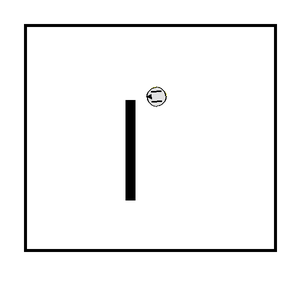

In [33]:
env.image()

In [11]:
mMove.invalidateCompetences()
mMove.competence(precise=True)

0.7381747313814161

No handles with labels found to put in legend.


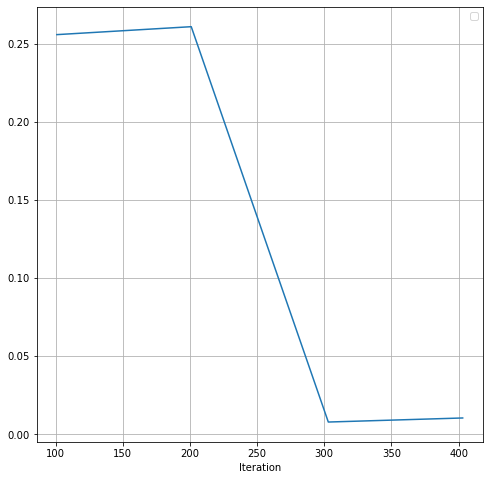

In [21]:
display(env.visualizeEvaluations())

In [24]:
print(env.evaluations())

Evaluator Agent SAGGLearner:
    Iteration 100 Evaluation @t=100 µ=0.444 σ=0.378 (2 test(s)):
        Result Test #Agent.position-0 @t=100 µ=0.134667409865212 σ=0.3273441541201062 (8 point(s)):
        -0: aimed for Goal[#6↝👁'#Agent.position'↕2 @☰ 300.000,  300.000] and reached Goal[#6↝👁'#Agent.position'↕2 @☰ 300.001,  300.134], error: 0.001817884266036243
        -1: aimed for Goal[#6↝👁'#Agent.position'↕2 @☰ 500.000,  300.000] and reached Goal[#6↝👁'#Agent.position'↕2 @☰ 500.058,  298.668], error: 0.018047706458116267
        -2: aimed for Goal[#6↝👁'#Agent.position'↕2 @☰ 400.000,  200.000] and reached Goal[#6↝👁'#Agent.position'↕2 @☰ 400.331,  199.804], error: 0.005210866345179906
        -3: aimed for Goal[#6↝👁'#Agent.position'↕2 @☰ 400.000,  400.000] and reached Goal[#6↝👁'#Agent.position'↕2 @☰ 400.077,  399.914], error: 0.001558526188006725
        -4: aimed for Goal[#6↝👁'#Agent.position'↕2 @☰ 300.000,  200.000] and reached Goal[#6↝👁'#Agent.position'↕2 @☰ 297.159,  201.578], error: 0.

In [54]:
print(env.evaluations())

Evaluator Agent SAGGLearner:
    Iteration 769 Evaluation @t=769 µ=0.005 σ=0.006 (2 test(s)):
        Result Test #Agent.position-0 @t=769 µ=0.003060281265781558 σ=0.003786879986757216 (8 point(s)):
        -0: aimed for Goal[#6↝👁'#Agent.position'↕2 @☰ 300.000,  300.000] and reached Goal[#6↝👁'#Agent.position'↕2 @☰ 300.010,  299.999], error: 0.0001367683994636532
        -1: aimed for Goal[#6↝👁'#Agent.position'↕2 @☰ 500.000,  300.000] and reached Goal[#6↝👁'#Agent.position'↕2 @☰ 499.735,  300.010], error: 0.003458097981453331
        -2: aimed for Goal[#6↝👁'#Agent.position'↕2 @☰ 400.000,  200.000] and reached Goal[#6↝👁'#Agent.position'↕2 @☰ 399.988,  200.009], error: 0.00019390394798662232
        -3: aimed for Goal[#6↝👁'#Agent.position'↕2 @☰ 400.000,  400.000] and reached Goal[#6↝👁'#Agent.position'↕2 @☰ 399.922,  400.010], error: 0.0010261943727610716
        -4: aimed for Goal[#6↝👁'#Agent.position'↕2 @☰ 300.000,  200.000] and reached Goal[#6↝👁'#Agent.position'↕2 @☰ 300.343,  200.330], 

In [53]:
env.evaluate()

2021-10-04 11:50:52 RedSky exlogger:c[13600] INFO [modular] Module 'Evaluator' has been started
2021-10-04 11:50:53 RedSky exlogger:c[13600] INFO [performer] Iter (d0) 4: prediction is Data[#6↝👁'#Agent.position'↕2 @☰± 2.522,  17.571] ?= planned Data[#6↝👁'#Agent.position'↕2 @☰±-12.043,  15.767] ?= got Observation[#0→👁'#Agent.position'↕2 @-19.408,  14.464]
2021-10-04 11:50:53 RedSky exlogger:c[13600] INFO [performer] Iter (d0) 4: max derive exceeded (7.4232 > 5.7879) trying to reach Data[#6↝👁'#Agent.position'↕2 @☰±-12.043,  15.767] by doing Action[#5↝🕹'#Agent.move'↕2 @☰±-0.742,  0.552] to get Data[#6↝👁'#Agent.position'↕2 @☰±-12.043,  15.767] and got Observation[#0→👁'#Agent.position'↕2 @-19.408,  14.464] Diff 7.4792
2021-10-04 11:50:53 RedSky exlogger:c[13600] INFO [performer] Replanning...
2021-10-04 11:50:53 RedSky exlogger:c[13600] WARNING [performer] Iter (d0) 4: no more action to execute... trying to replan new ones
2021-10-04 11:50:54 RedSky exlogger:c[13600] INFO [evaluation] Test 

In [ ]:
# env.evaluations

In [55]:
mMove.competence(precise=True)

0.8538242821564188

c:\Data\Projects\phd\cdl\env\lib\site-packages\matplotlib\textpath.py:84: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
c:\Data\Projects\phd\cdl\env\lib\site-packages\matplotlib\textpath.py:84: RuntimeWarning: Glyph 56697 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
c:\Data\Projects\phd\cdl\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Data\Projects\phd\cdl\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Data\Projects\phd\cdl\env\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Data\Projects\phd\cdl\env\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 5669

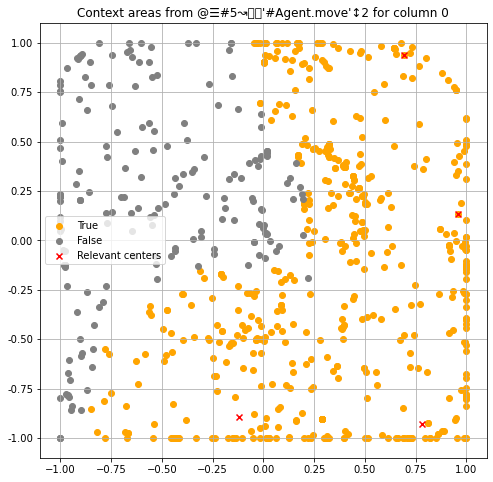

In [29]:
display(mMove.contextSpacialization[0].visualizeAreaColumn(0))

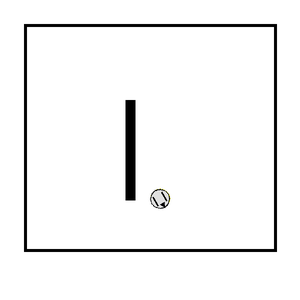

In [19]:
env.world.child('Agent').body.position = [350,  250]
# env.world.child('#Cylinder1').body.position = [150,  350]
context = env.state().context()
env.image()

2021-04-02 14:32:54 RedSky exlogger:c[34560] DEBUG [plan] Parting space to find models reaching @☰#9↝👁'#Agent.position'↕2
2021-04-02 14:32:54 RedSky exlogger:c[34560] DEBUG [plan] === New planning (d0) === -> Goal[#9↝👁'#Agent.position'↕2 @☰ 150.000,  150.000] using ModelInterestModel(@☰#8↝🕹'#Agent.move'↕2 | @☰#11↝👁'#Agent.lidar':PRE↕8 => @☰#9↝👁'#Agent.position'↕2)
2021-04-02 14:32:54 RedSky exlogger:c[34560] DEBUG [plan] == Relative goal is Data[#9↝👁'#Agent.position'↕2 @☰±-200.000, -100.000] (starting pos Data[#9↝👁'#Agent.position'↕2 @☰ 350.000,  250.000]) State ([SingleObservation(#9↝👁'#Agent.position'↕2 @☰ 350.000,  250.000), SingleObservation(#21↝👁'#Agent.positionToAgent'↕2 @☰ 0.000,  0.000), SingleObservation(#22↝👁'#Agent.color'↕3 @☰ 0.000,  0.000,  0.000), SingleObservation(#10↝👁'#Agent.lidar'↕8 @☰ 70.000,  70.000,  70.000,  70.000,  70.000,  70.000,  70.000,  70.000), SingleObservation(#18↝👁'#Cylinder1.position'↕2 @☰ 150.000,  350.000), SingleObservation(#14↝👁'#Cylinder1.position

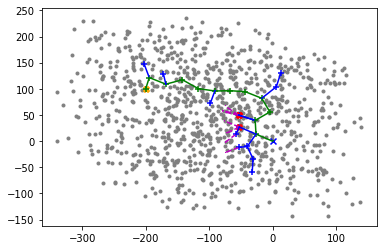

2021-04-02 14:32:57 RedSky exlogger:c[34560] DEBUG [plan] (d0) Planning generated for goal Data[#9↝👁'#Agent.position'↕2 @☰±-200.000, -100.000] in 34 step(s)


In [34]:
with logger().debugging('plan'):
    learner.planner.plan(learner.propertySpace('Agent.position').point([150,  150]).setRelative(False))

In [12]:
with logger().debugging('perform'):
    learner.reach(learner.propertySpace('Agent.position').point([-50, 0]).setRelative(True))

2021-04-27 15:59:33 RedSky exlogger:c[21140] DEBUG [performer] Iter (d0) 0: pre execution check: should be at Data[#9↝👁'#Agent.position'↕2 @☰ 399.547,  248.943] and currently at Data[#9↝👁'#Agent.position'↕2 @☰ 399.547,  248.943], diff 0.0000
Current Pre State:
Data[#0→👁'#Agent.position'↕2 @ 399.547,  248.943
    #1→👁'#Agent.positionToAgent'↕2 @ 0.000,  0.000
    #2→👁'#Agent.color'↕3 @ 0.000,  0.000,  0.000
    #3→👁'#Agent.lidar'↕8 @ 70.000,  70.000,  70.000,  70.000,  70.000,  70.000,  70.000,  70.000
    #5→👁'#Cylinder1.position'↕2 @ 150.000,  350.000
    #6→👁'#Cylinder1.positionToAgent'↕2 @-249.547,  101.057
    #7→👁'#Cylinder1.color'↕3 @ 0.000,  224.000,  128.000]
2021-04-27 15:59:33 RedSky exlogger:c[21140] INFO 210...
2021-04-27 15:59:33 RedSky exlogger:c[21140] DEBUG [performer] Iter (d0) 0: wanting Data[#9↝👁'#Agent.position'↕2 @☰ 376.363,  248.720] and got Data[#9↝👁'#Agent.position'↕2 @☰ 376.435,  248.703] 
     Diff 0.0734 doing Action[#8↝🕹'#Agent.move'↕2 @☰±-0.887, -0.009] to 

2021-03-05 17:02:26 RedSky exlogger:c[14468] DEBUG [plan] Parting space to find models reaching @☰#14↝👁'#Cylinder1.positionToAgent'↕2
2021-03-05 17:02:26 RedSky exlogger:c[14468] DEBUG [plan] === New planning (d0) === -> Goal[#14↝👁'#Cylinder1.positionToAgent'↕2 @☰ 0.000,  100.000] using ModelInterestModel(@☰#9↝👁'#Agent.position'↕2 | @☰#15↝👁'#Cylinder1.positionToAgent':PRE↕2 => @☰#14↝👁'#Cylinder1.positionToAgent'↕2)
2021-03-05 17:02:26 RedSky exlogger:c[14468] DEBUG [plan] == Relative goal is Data[#14↝👁'#Cylinder1.positionToAgent'↕2 @☰± 200.000,  100.000] (starting pos Data[#14↝👁'#Cylinder1.positionToAgent'↕2 @☰-200.000, -0.000]) State ([SingleObservation(#9↝👁'#Agent.position'↕2 @☰ 350.000,  250.000), SingleObservation(#21↝👁'#Agent.positionToAgent'↕2 @☰ 0.000,  0.000), SingleObservation(#22↝👁'#Agent.color'↕3 @☰ 0.000,  0.000,  0.000), SingleObservation(#10↝👁'#Agent.lidar'↕8 @☰ 70.000,  70.000,  70.000,  70.000,  70.000,  70.000,  70.000,  70.000), SingleObservation(#18↝👁'#Cylinder1.posi

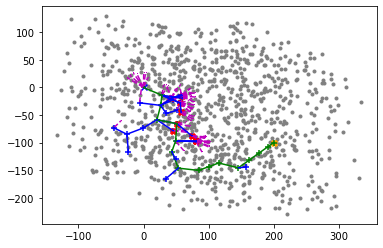

2021-03-05 17:02:32 RedSky exlogger:c[14468] DEBUG [plan] (d0) Planning generated for goal Data[#14↝👁'#Cylinder1.positionToAgent'↕2 @☰± 200.000,  100.000] in 106 step(s)


In [30]:
with logger().debugging('plan'):
    # learner.planner.plan(learner.propertySpace('Agent.position').point([100,  0]).setRelative(True))
    learner.planner.plan(learner.propertySpace('#Cylinder1.positionToAgent').point([0,  100]).setRelative(False))

In [10]:
learner.reach(learner.propertySpace('Agent.position').point([150,  250]).setRelative(False))

2021-03-31 16:19:54 RedSky exlogger:c[17264] INFO [interest] ERROR 0.0550 for action Action[#17↝🕹'#Agent.move'↕2 @☰±-0.759, -0.882] predictedOutcome Data[#9↝👁'#Agent.position'↕2 @☰±-0.138, -23.048] =? Observation[#9↝👁'#Agent.position'↕2 @☰ 1.507, -23.026] model ModelInterestModel(@☰#17↝🕹'#Agent.move'↕2 | @☰#29↝👁'#Agent.lidar':PRE↕8 => @☰#9↝👁'#Agent.position'↕2)
2021-03-31 16:19:54 RedSky exlogger:c[17264] INFO [interest] ERROR 0.0961 for action Action[#17↝🕹'#Agent.move'↕2 @☰±-0.947, -0.423] predictedOutcome Data[#9↝👁'#Agent.position'↕2 @☰±-3.166, -11.039] =? Observation[#9↝👁'#Agent.position'↕2 @☰-0.864, -11.081] model ModelInterestModel(@☰#17↝🕹'#Agent.move'↕2 | @☰#29↝👁'#Agent.lidar':PRE↕8 => @☰#9↝👁'#Agent.position'↕2)
2021-03-31 16:19:54 RedSky exlogger:c[17264] INFO 450...
2021-03-31 16:19:55 RedSky exlogger:c[17264] INFO [interest] ERROR 0.0936 for action Action[#17↝🕹'#Agent.move'↕2 @☰±-0.450,  0.287] predictedOutcome Data[#9↝👁'#Agent.position'↕2 @☰±-5.709, -1.540] =? Observation[#9↝

In [38]:
learner.reach(learner.propertySpace('#Cylinder1.positionToAgent').point([0,  50]).setRelative(False))

2021-03-05 17:12:09 RedSky exlogger:c[14468] INFO [interest] ERROR 0.1147 for action Action[#8↝🕹'#Agent.move'↕2 @☰±-0.463, -0.433] predictedOutcome Data[#9↝👁'#Agent.position'↕2 @☰±-10.089, -13.608] =? Observation[#9↝👁'#Agent.position'↕2 @☰-12.086, -11.279] model ModelInterestModel(@☰#8↝🕹'#Agent.move'↕2 | @☰#11↝👁'#Agent.lidar':PRE↕8 => @☰#9↝👁'#Agent.position'↕2)


No handles with labels found to put in legend.


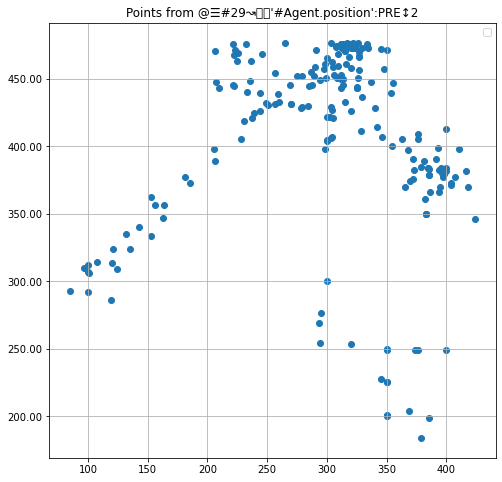

In [16]:
from dino.data.space import SpaceKind
display(learner.propertySpace('Agent.position', kind=SpaceKind.PRE).visualizeData())